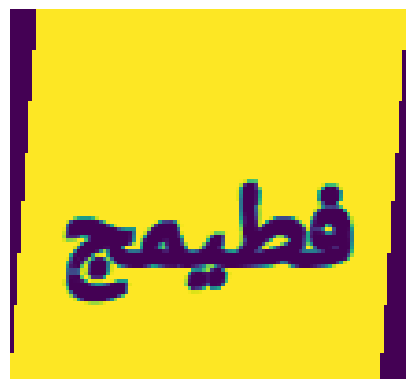

Image size: (107, 100)
Image format: PNG


In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Path to the directory containing images
image_dir = '/kaggle/input/machine-learning-project-data/all_words'

# List all files in the directory
image_files = os.listdir(image_dir)

# Filter out only image files (optional, if needed)
image_files = [file for file in image_files if file.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]

# Load and display the first image
if image_files:
    first_image_path = os.path.join(image_dir, image_files[0])
    image = Image.open(first_image_path)

    # Display the image
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()

    # Print image details
    print(f"Image size: {image.size}")
    print(f"Image format: {image.format}")
else:
    print("No images found in the directory.")


In [2]:
import os
from PIL import Image
import numpy as np

# Path to the directory containing images
image_dir = '/kaggle/input/machine-learning-project-data/all_words'

# List all files in the directory
image_files = os.listdir(image_dir)

# Filter out only image files (optional, if needed)
image_files = [file for file in image_files if file.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]

# Load all images into a list
images = []
for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    image = Image.open(image_path)
    images.append(image)

# Display the number of images loaded
print(f"Loaded {len(images)} images.")


Loaded 175760 images.


In [17]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Function to load filenames and preprocess labels
def load_and_preprocess_labels(image_dir):
    labels = []
    filenames = []
    for filename in os.listdir(image_dir):
        if filename.endswith('.png'):
            parts = filename.split('_')
            label = '_'.join(parts[:4])
            labels.append(label)
            filenames.append(filename)
    return filenames, labels

# Function to load images
def load_images(image_dir, filenames):
    images = []
    for filename in filenames:
        img_path = os.path.join(image_dir, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (128, 32))
        images.append(img)
    return np.array(images)

# Path to your dataset directory
image_dir = '/kaggle/input/machine-learning-project-data/all_words'

# Load and preprocess labels
filenames, labels = load_and_preprocess_labels(image_dir)

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Load images
images = load_images(image_dir, filenames)

# Normalize images
images = images / 255.0
images = images.reshape(-1, 32, 128, 1)

# Use only the first 150000 images
images = images[:15000]
encoded_labels = encoded_labels[:15000]

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, encoded_labels, test_size=0.2, random_state=42)

# Define the CNN model
def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Create the model
input_shape = (32, 128, 1)
num_classes = len(np.unique(encoded_labels))  # Number of unique classes
model = create_cnn_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print('Test Accuracy:', test_accuracy)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
 31/375 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0095 - loss: 5.1564

W0000 00:00:1720167033.954998     217 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


369/375 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0089 - loss: 5.1313

W0000 00:00:1720167036.144392     219 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0090 - loss: 5.1308 - val_accuracy: 0.0297 - val_loss: 4.9085
Epoch 2/50
 41/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0274 - loss: 4.9016

W0000 00:00:1720167037.030868     219 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0403 - loss: 4.6675 - val_accuracy: 0.2027 - val_loss: 3.6886
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1297 - loss: 3.8027 - val_accuracy: 0.3483 - val_loss: 2.9575
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2169 - loss: 3.2579 - val_accuracy: 0.4460 - val_loss: 2.5080
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3088 - loss: 2.7783 - val_accuracy: 0.5167 - val_loss: 2.1274
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3524 - loss: 2.5091 - val_accuracy: 0.5500 - val_loss: 1.8918
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4011 - loss: 2.2693 - val_accuracy: 0.5827 - val_loss: 1.7056
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4233 - loss: 2.1080 - val_accuracy: 0.6230 - val_loss: 1.5503
Epoch 9/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4746 - loss: 1.8874 - val_accuracy: 0.6350 - val_

In [19]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback

# Function to load filenames and preprocess labels
def load_and_preprocess_labels(image_dir):
    labels = []
    filenames = []
    for filename in os.listdir(image_dir):
        if filename.endswith('.png'):
            parts = filename.split('_')
            label = '_'.join(parts[:4])
            labels.append(label)
            filenames.append(filename)
    return filenames, labels

# Function to load images
def load_images(image_dir, filenames):
    images = []
    for filename in filenames:
        img_path = os.path.join(image_dir, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (128, 32))
        images.append(img)
    return np.array(images)

# Path to your dataset directory
image_dir = '/kaggle/input/machine-learning-project-data/all_words'

# Load and preprocess labels
filenames, labels = load_and_preprocess_labels(image_dir)

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Load images
images = load_images(image_dir, filenames)

# Normalize images
images = images / 255.0
images = images.reshape(-1, 32, 128, 1)

# Use only the first 15000 images
images = images[:15000]
encoded_labels = encoded_labels[:15000]

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, encoded_labels, test_size=0.2, random_state=42)

# Define the CNN model
def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Create the model
input_shape = (32, 128, 1)
num_classes = len(np.unique(encoded_labels))  # Number of unique classes
model = create_cnn_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define a callback to print validation accuracy
class ValidationCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        val_loss, val_accuracy = self.model.evaluate(X_val, y_val, verbose=0)
        print(f"Validation Accuracy after epoch {epoch + 1}: {val_accuracy:.4f}")

# Train the model with the callback
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[ValidationCallback()])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f'Test Accuracy: {test_accuracy:.4f}')


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
 42/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0022 - loss: 5.1454  

W0000 00:00:1720167665.034839     218 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


374/375 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0058 - loss: 5.1337

W0000 00:00:1720167667.134975     217 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1720167667.863166     217 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Validation Accuracy after epoch 1: 0.0037
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.0058 - loss: 5.1337 - val_accuracy: 0.0037 - val_loss: 5.1294
Epoch 2/50
374/375 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0137 - loss: 5.0375Validation Accuracy after epoch 2: 0.0523
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0138 - loss: 5.0365 - val_accuracy: 0.0523 - val_loss: 4.3538
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0519 - loss: 4.2954Validation Accuracy after epoch 3: 0.1790
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0519 - loss: 4.2950 - val_accuracy: 0.1790 - val_loss: 3.5467
Epoch 4/50
369/375 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1164 - loss: 3.6582Validation Accuracy after epoch 4: 0.2937
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1166 - loss: 3.6562 - val_accuracy: 0.2937 - val_loss: 2.8484
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1762 - loss: 3.1680Validation Accuracy afte

In [22]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback

def load_and_preprocess_labels(image_dir):
    labels = []
    filenames = []
    for filename in os.listdir(image_dir):
        if filename.endswith('.png'):
            parts = filename.split('_')
            label = '_'.join(parts[:4])
            labels.append(label)
            filenames.append(filename)
    return filenames, labels

def load_images(image_dir, filenames):
    images = []
    for filename in filenames:
        img_path = os.path.join(image_dir, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (128, 32))
        images.append(img)
    return np.array(images)

image_dir = '/kaggle/input/machine-learning-project-data/all_words'

filenames, labels = load_and_preprocess_labels(image_dir)

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

images = load_images(image_dir, filenames)

images = images / 255.0
images = images.reshape(-1, 32, 128, 1)

images = images[:15000]
encoded_labels = encoded_labels[:15000]

X_train, X_val, y_train, y_val = train_test_split(images, encoded_labels, test_size=0.2, random_state=42)

def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

input_shape = (32, 128, 1)
num_classes = len(np.unique(encoded_labels))  # Number of unique classes
model = create_cnn_model(input_shape, num_classes)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

class ValidationCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        val_loss, val_accuracy = self.model.evaluate(X_val, y_val, verbose=0)
        print(f"Validation Accuracy after epoch {epoch + 1}: {val_accuracy:.4f}")

history = model.fit(X_train, y_train, epochs=60, batch_size=32, validation_data=(X_val, y_val), callbacks=[ValidationCallback()])

test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f'Test Accuracy: {test_accuracy:.4f}')


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
 37/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0069 - loss: 5.1278

W0000 00:00:1720168689.751769     219 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


373/375 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0068 - loss: 5.1296

W0000 00:00:1720168692.151334     217 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1720168693.498668     220 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Validation Accuracy after epoch 1: 0.0043
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.0068 - loss: 5.1296 - val_accuracy: 0.0043 - val_loss: 5.1306
Epoch 2/60
372/375 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0072 - loss: 5.1278Validation Accuracy after epoch 2: 0.0103
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0072 - loss: 5.1277 - val_accuracy: 0.0103 - val_loss: 5.0392
Epoch 3/60
373/375 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0202 - loss: 4.8624Validation Accuracy after epoch 3: 0.0863
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0202 - loss: 4.8610 - val_accuracy: 0.0863 - val_loss: 4.1604
Epoch 4/60
373/375 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0734 - loss: 4.0889Validation Accuracy after epoch 4: 0.2793
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0736 - loss: 4.0872 - val_accuracy: 0.2793 - val_loss: 2.9707
Epoch 5/60
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1950 - loss: 3.1690Validation Accuracy af

In [24]:

model.summary()


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)              │ (None, 32, 128, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 16, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 16, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 8, 32, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 8, 32, 64)      │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 4, 16, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 4, 16, 64)      │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 2, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 169)            │        21,801 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 737,021 (2.81 MB)

 Trainable params: 245,673 (959.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 491,348 (1.87 MB)

In [7]:
import tensorflow as tf
print(tf.__version__)


2.15.0


In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from PIL import Image
import os
